# Analyse de données médicales

Merci de renseigner vos nom et prénom:

In [ ]:
# Maslova
# Vitaliia

Vous avez droit à internet, à vos notes de cours, mais pas d'IA générative. L'épreuve dure 1h30.

## **Objectifs :**
- Manipuler des données avec **Pandas** et **NumPy**.
- Effectuer des **statistiques descriptives**.
- Visualiser les données avec **Matplotlib** (histogrammes, diagrammes en bâtons).
- Faire une **régression linéaire** pour analyser une tendance.

## **Contexte :**
On se donne un jeu de données contenant des informations sur des patients et leur risque d'AVC. Ton objectif est d’extraire des informations utiles et de visualiser les tendances.

---

## Chargement et exploration des données

Pour information les colonnes représentent les données suivantes:

* `gender`: le genre (`Male`, `Female` ou `Other`) du patient,
* `age`: l'age du patient,
* `hypertension`: 0 si le patient n'a pas d'hypertension, 1 sinon,
* `hear_disease`: 0 si le patient n'a jamais eu de maladie cardiaque, 1 sinon,
* `ever_married`: `No` ou `Yes` si le patient a déjà été marié,
* `work_type`: l'emploi du patient (`children`, `Govt_job`, `Never_worked`, `Private` or `Self-employed`),
* `Residence_type`: `rural` ou `urbain`,
* `avg_glucose_level`: le niveau de glucose dans le sang,
* `bmi`: l'IMC (*body mass index*),
* `smoking_status`: selon si le patient fume: `formerly smoked`, `never smoked` `smokes` or `Unknown`,
* `stroke`: 1 si le patient a un AVC, 0 sinon (la variable que l'on souhaite prédire).

Dans cette partie, nous allons commencer par charger le fichier CSV et effectuer une première exploration des données:
- chargez les données sous la forme d'un data frame
- affichez les premières lignes pour se faire une idée



In [1]:
# chargement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Donnez la taille du jeu de donnée (nombre de lignes et de colonnes)

In [6]:
# taille du dataset
# data.describe
# data.info
data.shape

(5110, 12)

Donnez le nombre de valeurs manquantes pour toutes les colonnes

In [15]:
# nombre de valeurs manquantes
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Donnez le nombre de personne ayant eu un AVC, ainsi que le pourcentage que cela représente

In [48]:
# nombre d'AVC et pourcentage.
listavc = list(data.stroke)
avc = 0
for i in range(len(listavc)):
    if data.stroke[i] == 1:
        avc = avc + 1
avc

249

In [50]:
# data.stroke.sum()

In [63]:
# pourcentage
percent = avc/len(listavc)
percent*100

4.87279843444227

## Statistiques descriptives

Donnez pour toutes les colonnes, la moyenne, l'écart-type, le min, le max et la médiane des valeurs. Sans être une obligation, c'est faisable en une ligne de pandas.

In [53]:
# statistiques générales du dataset
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Donnez la moyenne d'âge des patients ayant eu un AVC

In [57]:
# moyenne d'age des patients
int(data.age.mean())

43

Donnez la répartition des patients selon leur type de travail

In [78]:
# répartition par type de travail
rep = data.groupby('work_type')['id'].count().to_dict()
rep

{'Govt_job': 657,
 'Never_worked': 22,
 'Private': 2925,
 'Self-employed': 819,
 'children': 687}

## Visualisation des données

- Sous la forme d'un diagramme en baton, représentez la distribution des ages des patients. Le diagramme devra comporter titre, légendes des axes, comme tous les diagrammes suivants.

Text(0.5, 1.0, 'Distribution de lage des patients')

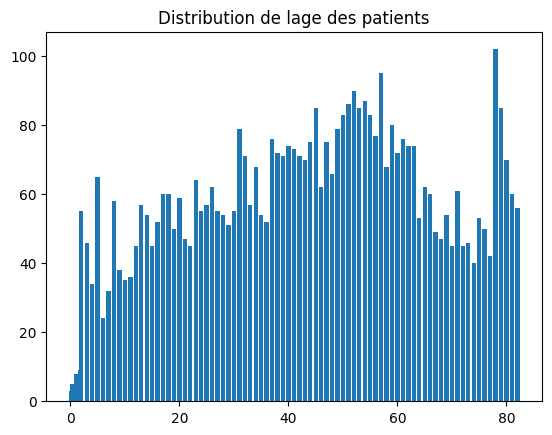

In [117]:
rep = data.groupby('age')['id'].count().to_dict()
x = rep.keys()
y = rep.values()
plt.bar(x, y)
plt.title('Distribution de lage des patients')

Text(0.5, 1.0, 'Distribution de lage des patients')

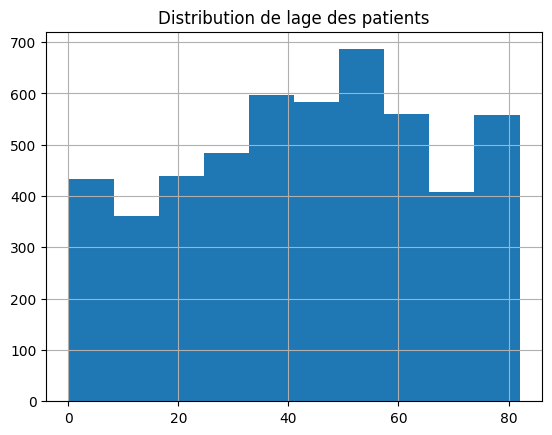

In [116]:
data.age.hist()
plt.title('Distribution de lage des patients')

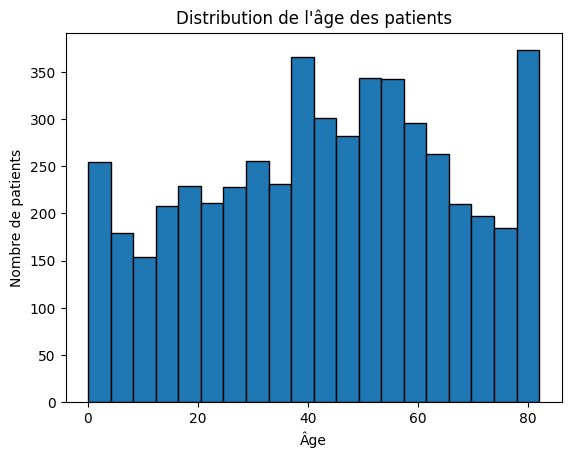

In [ ]:
# distribution des ages
# PROFESSORS

Sous la forme d'un diagramme en baton, donnez la proportion d'AVC selon le sexe des patients

Text(0.5, 1.0, 'Nombre de patients ayant eu un AVC par sexe')

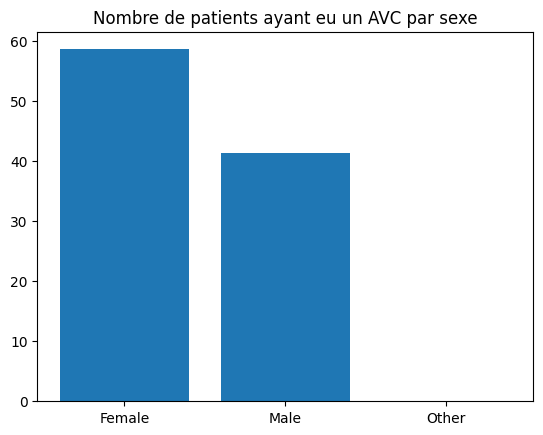

In [148]:
prop = data.groupby('gender')['stroke'].count().to_dict()

prop = {key: value/len(listavc)*100 for key, value in prop.items()}

plt.bar(prop.keys(), prop.values())
plt.title('Nombre de patients ayant eu un AVC par sexe')

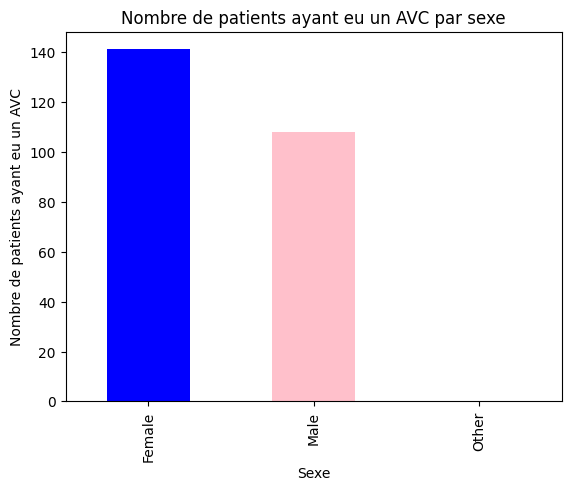

In [ ]:
# proportion AVC en fonction du sexe
# TODO

Donnez le niveau de glucose moyen des patients avec et sans AVC sous la forme d'un diagramme en camembert.

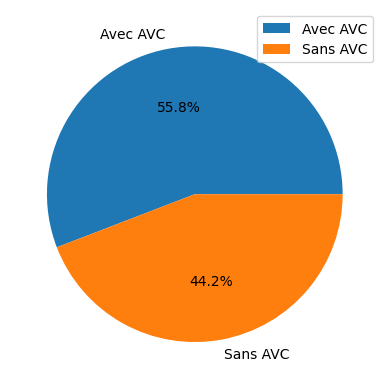

In [2]:
withAvc = []
for i in range(len(data.stroke)):
    if data.stroke[i] == 1:
        withAvc.append(data.avg_glucose_level[i])
yesavc = sum(withAvc)/len(withAvc)

outAvc = []
for i in range(len(data.stroke)):
    if data.stroke[i] == 0:
        outAvc.append(data.avg_glucose_level[i])
noavc = sum(outAvc)/len(outAvc)

y = [yesavc, noavc]
mylabels = ["Avec AVC", "Sans AVC"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend()
plt.show()

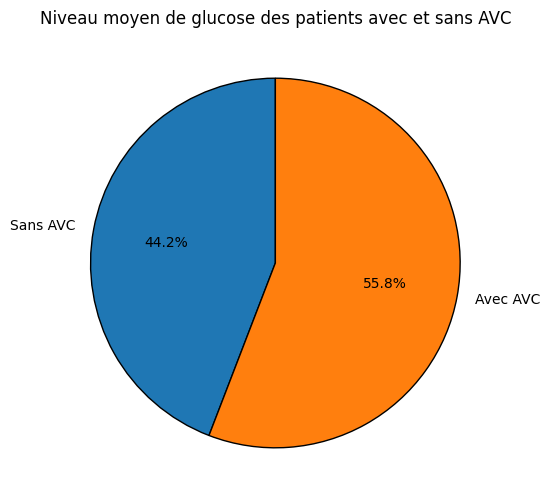

In [ ]:
# niveau moyen de glucose
# TODO

Donnez le bmi moyen et le taux de glucose moyen pour les patients ayant eu ou non un AVC sous la forme d'un diagramme en baton.

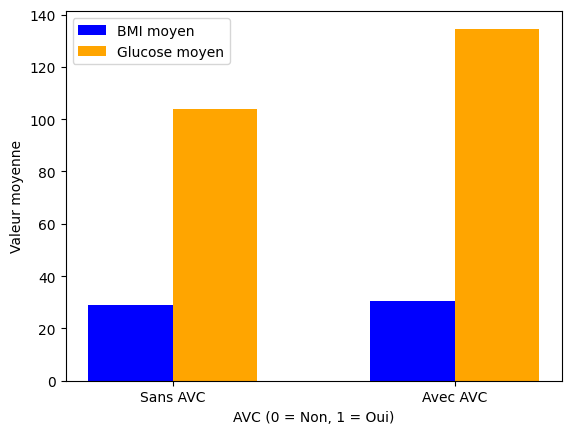

In [18]:
data2 = data.dropna()
# Data
categories = ['Sans AVC', 'Avec AVC']
yesbmi = data2.loc[data2.stroke == 1, 'bmi'].mean()
nobmi = data2.loc[data2.stroke == 0, 'bmi'].mean()
bmi = [nobmi, yesbmi]

yesglucose = data2.loc[data2.stroke == 1, 'avg_glucose_level'].mean()
noglucose = data2.loc[data2.stroke == 0, 'avg_glucose_level'].mean()
glucose = [noglucose, yesglucose]

x = np.arange(len(categories))  # Positions for categories
width = 0.3  # Width of bars

# Create bar chart
fig, ax = plt.subplots()
ax.bar(x - width/2, bmi, width, label="BMI moyen", color="blue")

ax.bar(x + width/2, glucose, width, label="Glucose moyen", color="orange")

# Labels & Title
ax.set_xlabel("AVC (0 = Non, 1 = Oui)")
ax.set_ylabel("Valeur moyenne")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

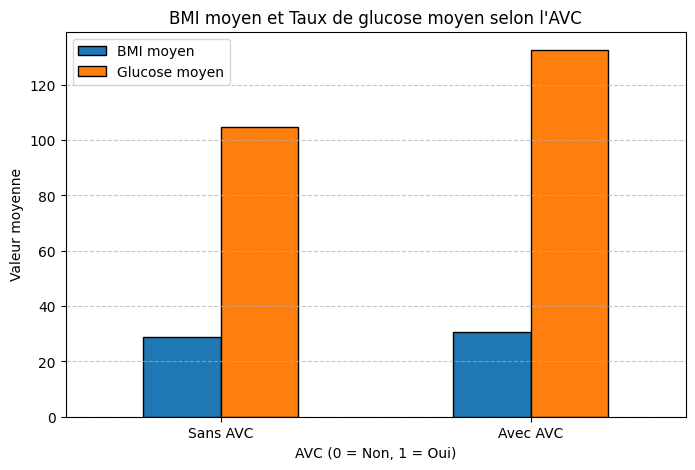

In [ ]:
# age moyen et taux de glucose
# TODO

## Régression linéaire

Tracez le graphique (en nuage de points) ayant en abscisse l'age et en ordonnées l'indice de masse corporel (`bmi`):

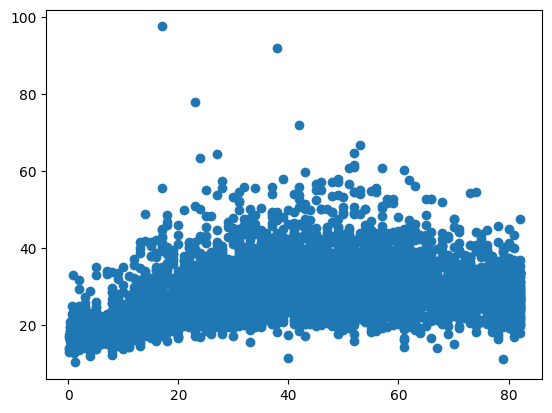

In [277]:
plt.plot(data.age, data.bmi, 'o')

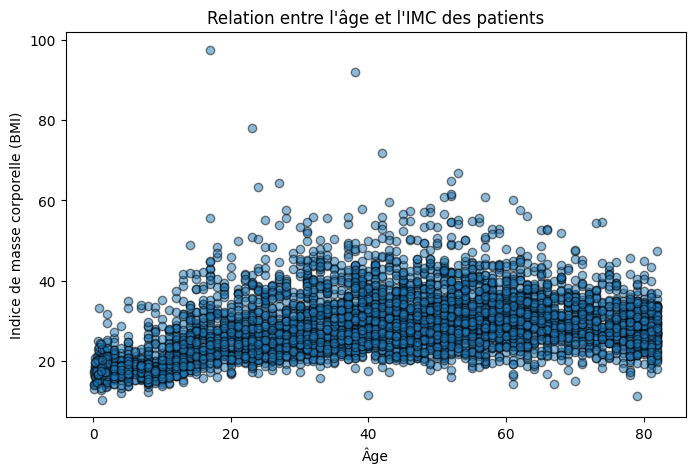

In [ ]:
# Nuage de point
# TODO

À partir du nuage de point ci-dessus, trouvez les paramètres $f(x) = ax + b$ optimums au sens des moindres carrés

In [270]:
data2 = data.dropna()
A = np.vstack([data2.age, np.ones(len(data2.age))]).T
w, r = np.linalg.lstsq(A, data2.bmi, rcond=None)[0]
y_pred = w*data2.age + r

In [ ]:
# Equation de la droite de régression linéaire
# TODO

 
0.1161 x + 23.92


Tracez à nouveau le nuage de point, en superposant la droite trouvée

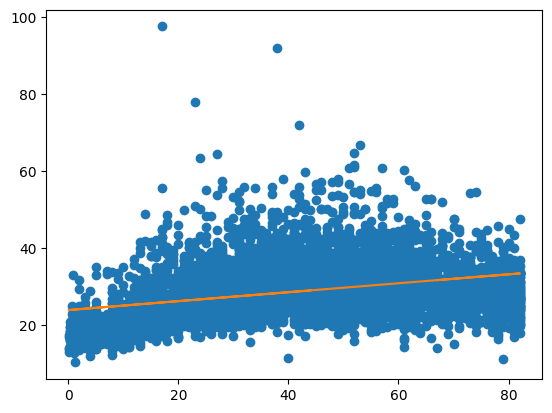

In [279]:
plt.plot(data.age, data.bmi, 'o')
plt.plot(data2.age, y_pred)

In [ ]:
# Nuage de point et régression linéaire
# TODO


Calculez le coefficient de détermination R2 comme vu en cours.

In [280]:
# Coéfficient de détermination R2
from sklearn.metrics import r2_score
R2 = r2_score(data2.bmi, y_pred)
R2

0.11115422317700041